Load the `tidyverse`. 📊

In [1]:
library('tidyverse')


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Run the following cell to get the CDC vaccination data. 

In [2]:
vax_data = read_csv(
    "covid19_vaccinations_in_the_united_states.csv", 
    na = 'N/A',
    col_types = cols()
)

What columns are in the data set? 


(**Hint:** for wide tables like this it can be useful to just print the column names using the `colnames` function—can you figure out how to use `colnames` from its documentation?)

In [ ]:

colnames(vax_data)

Make a histogram (with a rug) of 18+ at-least-one-dose vaccination rates (percent) for all states. **When you're working with a column name that has spaces, you need to wrap it in back ticks \`\`.**

Like this:

```R
aes(x = `some column name with spaces`)
```

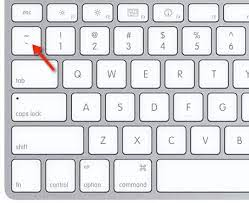

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”


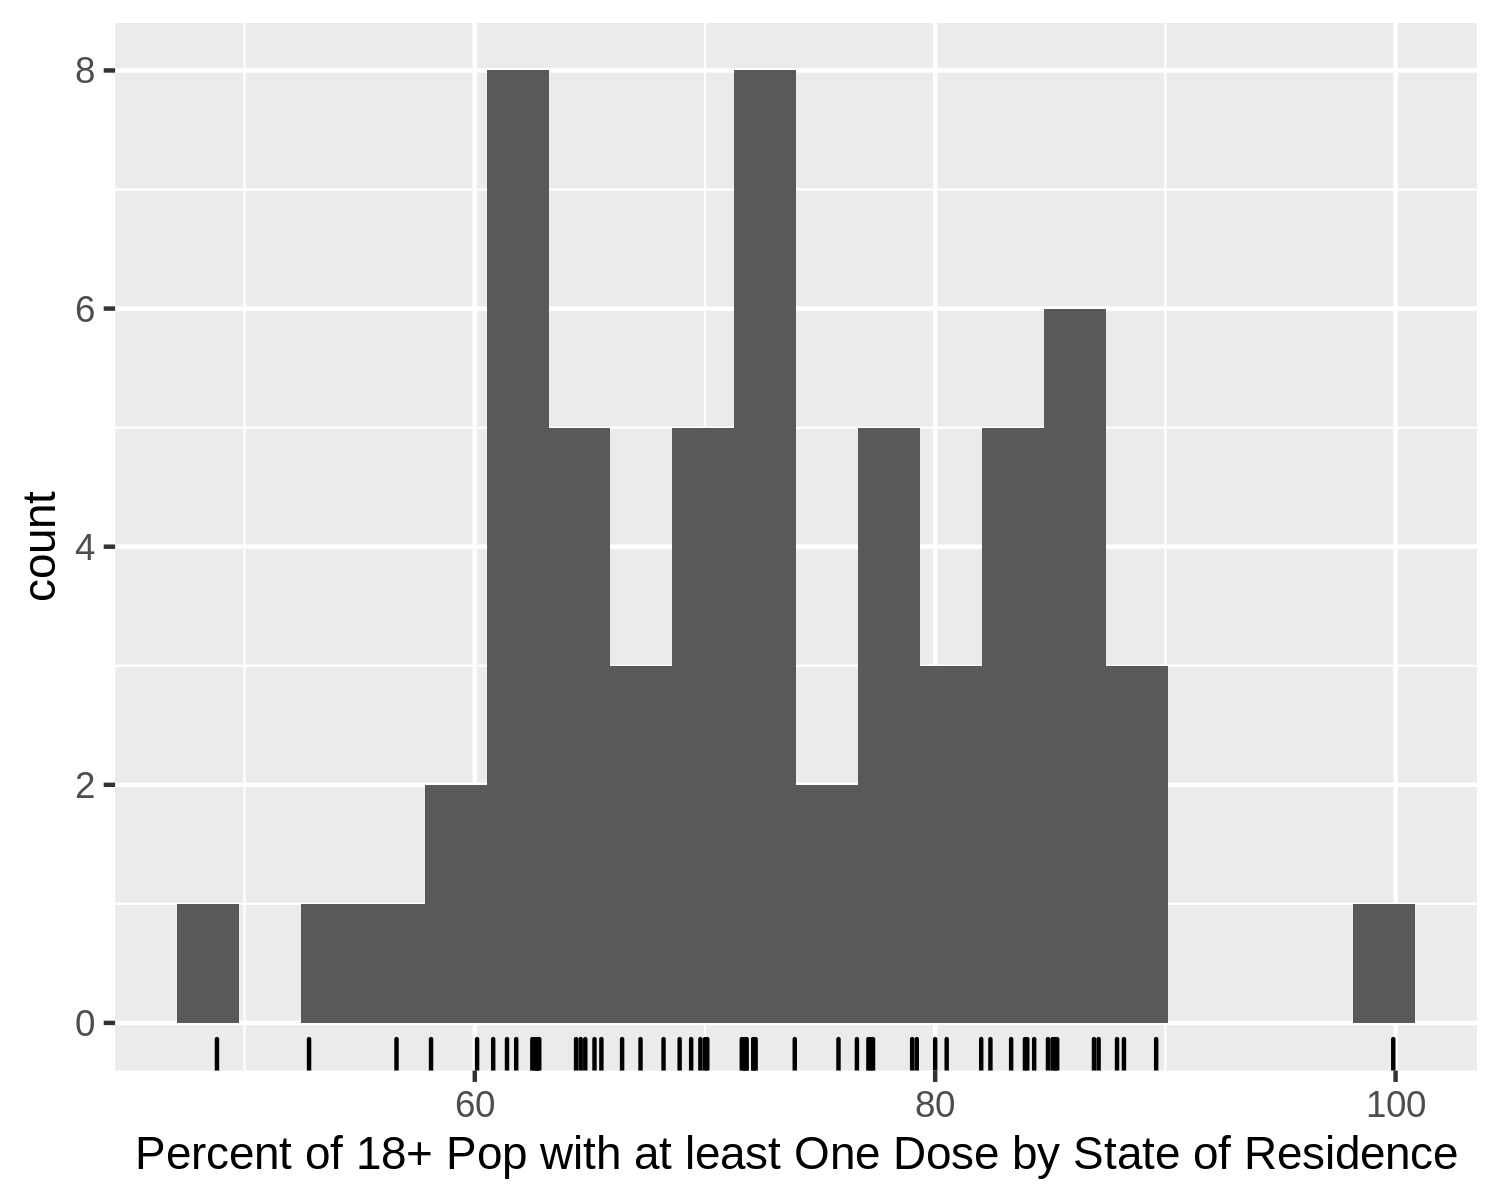

In [23]:
p = ggplot(vax_data, aes(x = `Percent of 18+ Pop with at least One Dose by State of Residence`))

p = p + geom_histogram(bins = 20)

p = p + geom_rug(size = 0.5)

p

The code below will pull out the vaccination rate for North Carolina.

In [24]:
vax_data %>%
    filter(`State/Territory/Federal Entity` == "North Carolina") %>%
    pull(`Percent of 18+ Pop with at least One Dose by State of Residence`) %>%
    paste("of 18 or older North Carolinians have at least 1 dose")

[1] "69.4 of 18 or older North Carolinians have at least 1 dose"

Can you use `geom_vline` to add a vertical line representing the position of NC's vaccination rate to your histogram? What arguments does `geom_vline` take?

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”


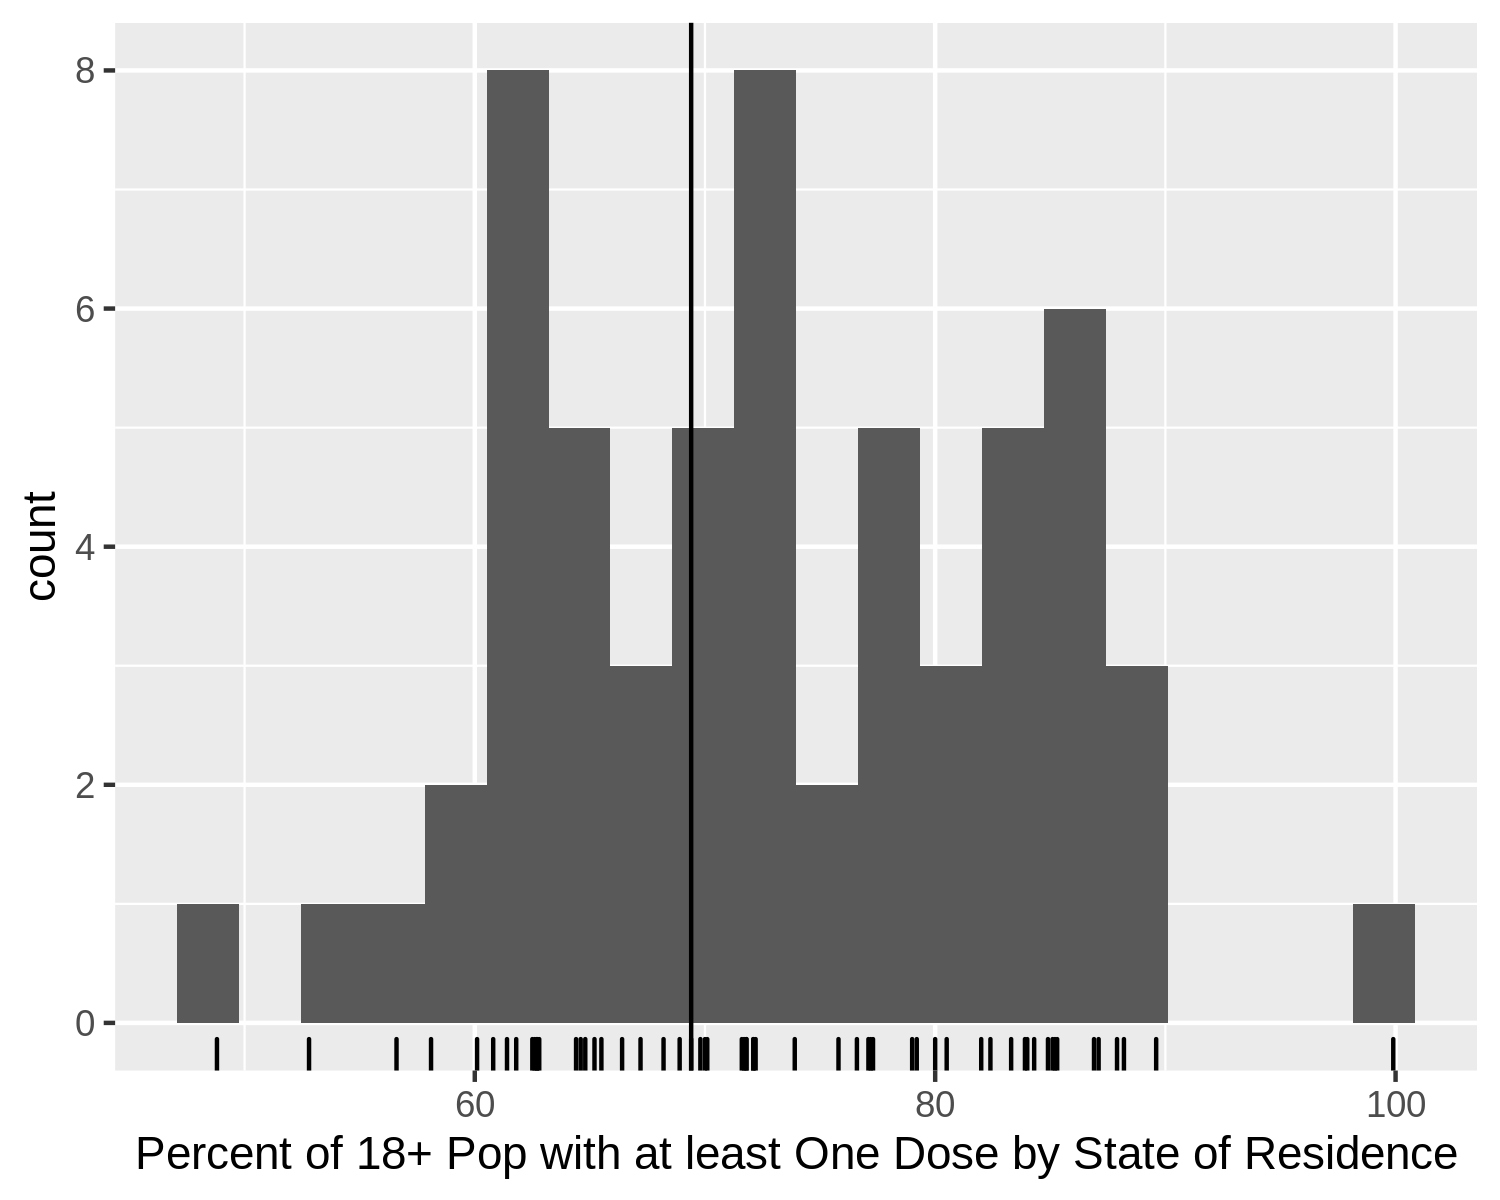

In [25]:
p = p + geom_vline(xintercept = 69.4)
p

🛑 **Stop here** 🛑

Use `percent_format` function from the `scales` and `scale_x_continuous` package to update the `x-axis` labels to percent formatting.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”


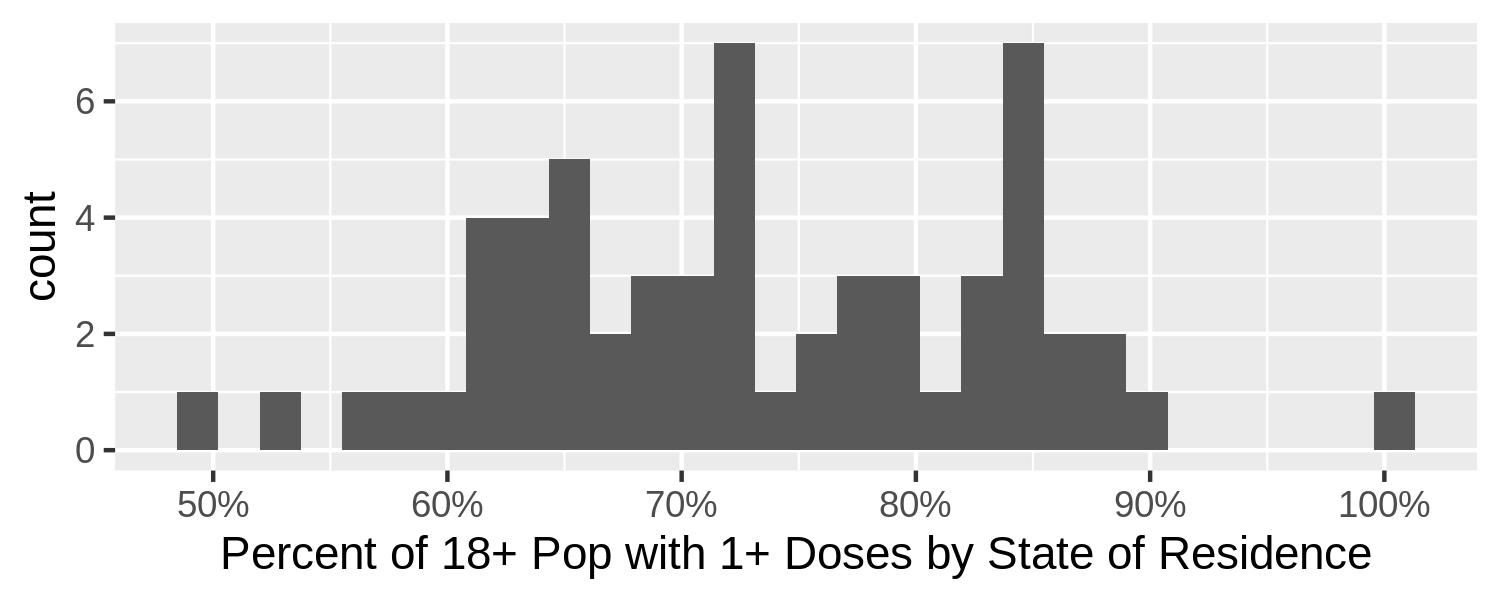

In [31]:
library('scales')

options(repr.plot.height = 2)

library('scales')

p = ggplot(
    vax_data, 
    aes(x = `Percent of 18+ Pop with 1+ Doses by State of Residence`)
)

p = p + geom_histogram()

p = p + scale_x_continuous(labels = percent_format(scale = 1))

p

Make the same chart with a different theme (E.g. try `theme_minimal`).

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”


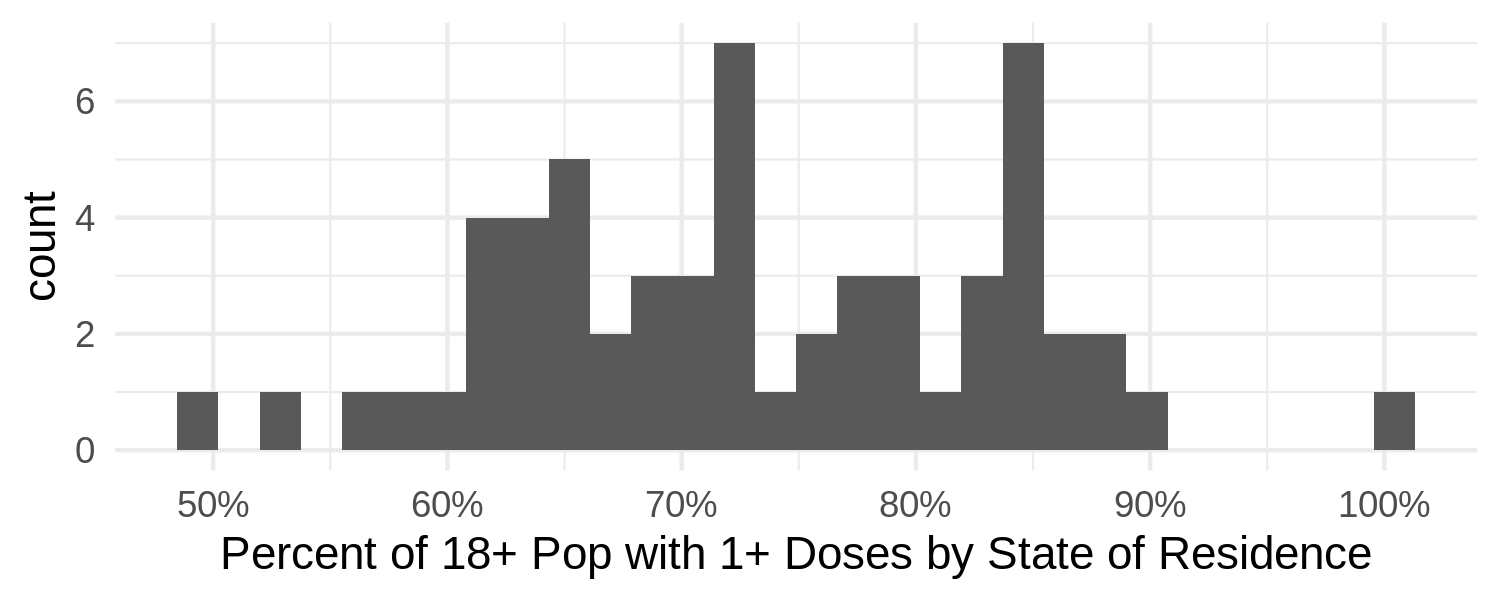

In [32]:
p = p + theme_minimal()
p